In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from PIL import Image
from PIL import ImageDraw
plt.style.use({'figure.figsize':(10, 10)})
pd.set_option('max_rows', 300)

In [2]:
Epsilon_start=1
Epsilon_final=0.01
Decay_Rate=0.0000001
Velocity_tripod=0.289*40
Velocity_quadruped=0.115*40
Velocity_onebyone=0.096*40
Up_degree=np.array([-40,-20,0,20,40])
Left_degree=np.array([-60,-80,-100,-120])
Right_degree=np.array([60,80,100,120]) #
Robot_r=40 #the radius of hexapod robot
Beta=0.9
Alpha=0.2

In the map, 'RGB' mode is used to reprensent different colors.

(0,0,0)---Black---Obstacle and margin

(255,255,255)---White---Flat ground

(255,0,0)---Red---Destination

(0,255,255)---Cyan---Hexapod robot

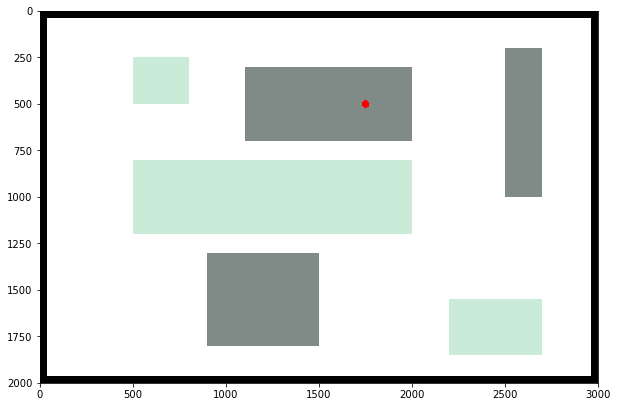

In [3]:
def Draw_map4(Destination_x,Destination_y):
    im4=Image.new('RGB',size=(3000,2000),color=(0,0,0))
    draw=ImageDraw.Draw(im4,mode='RGB')
    draw.rectangle((40,40,2960,1960),(255,255,255),(255,255,255))
    draw.rectangle((500,800,1000,1200),(202,235,216),(202,235,216))
    draw.rectangle((500,800,800,1200),(202,235,216),(202,235,216))
    draw.rectangle((900,1300,1500,1800),(128,138,135),(128,138,135))
    draw.rectangle((2000,800,800,1200),(202,235,216),(202,235,216))
    draw.rectangle((500,250,800,500),(202,235,216),(202,235,216))
    draw.rectangle((2500,200,2700,1000),(128,138,135),(128,138,135))
    draw.rectangle((1100,300,2000,700),(128,138,135),(128,138,135))
    draw.rectangle((2200,1550,2700,1850),(202,235,216),(202,235,216))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im4
im4=Draw_map4(1750,500)
plt.imshow(im4)
plt.show()

In [4]:
States=np.array(['L60D0/30/H0','L180D0/30/H0','L250D0/30/H0','L300D0/30/H0',
'L60D30/60/H0','L180D30/60/H0','L250D30/60/H0','L300D30/60/H0',
'L60D60/90/H0','L180D60/90/H0','L250D60/90/H0','L300D60/90/H0',
'L60D90/120/H0','L180D90/120/H0','L250D90/120/H0','L300D90/120/H0',
'L60D120/150/H0','L180D120/150/H0','L250D120/150/H0','L300D120/150/H0',
'L60D150/180/H0','L180D150/180/H0','L250D150/180/H0','L300D150/180/H0',
'L60D180/210/H0','L180D180/210/H0','L250D180/210/H0','L300D180/210/H0',
'L60D210/240/H0','L180D210/240/H0','L250D210/240/H0','L300D210/240/H0',
'L60D240/270/H0','L180D240/270/H0','L250D240/270/H0','L300D240/270/H0',
'L60D270/300/H0','L180D270/300/H0','L250D270/300/H0','L300D270/300/H0',
'L60D300/330/H0','L180D300/330/H0','L250D300/330/H0','L300D300/330/H0',
'L60D330/360/H0','L180D330/360/H0','L250D330/360/H0','L300D330/360/H0',
'L60D0/30/H1','L180D0/30/H1','L250D0/30/H1','L300D0/30/H1',
'L60D30/60/H1','L180D30/60/H1','L250D30/60/H1','L300D30/60/H1',
'L60D60/90/H1','L180D60/90/H1','L250D60/90/H1','L300D60/90/H1',
'L60D90/120/H1','L180D90/120/H1','L250D90/120/H1','L300D90/120/H1',
'L60D120/150/H1','L180D120/150/H1','L250D120/150/H1','L300D120/150/H1',
'L60D150/180/H1','L180D150/180/H1','L250D150/180/H1','L300D150/180/H1',
'L60D180/210/H1','L180D180/210/H1','L250D180/210/H1','L300D180/210/H1',
'L60D210/240/H1','L180D210/240/H1','L250D210/240/H1','L300D210/240/H1',
'L60D240/270/H1','L180D240/270/H1','L250D240/270/H1','L300D240/270/H1',
'L60D270/300/H1','L180D270/300/H1','L250D270/300/H1','L300D270/300/H1',
'L60D300/330/H1','L180D300/330/H1','L250D300/330/H1','L300D300/330/H1',
'L60D330/360/H1','L180D330/360/H1','L250D330/360/H1','L300D330/360/H1',
'L60D0/30/H2','L180D0/30/H2','L250D0/30/H2','L300D0/30/H2',
'L60D30/60/H2','L180D30/60/H2','L250D30/60/H2','L300D30/60/H2',
'L60D60/90/H2','L180D60/90/H2','L250D60/90/H2','L300D60/90/H2',
'L60D90/120/H2','L180D90/120/H2','L250D90/120/H2','L300D90/120/H2',
'L60D120/150/H2','L180D120/150/H2','L250D120/150/H2','L300D120/150/H2',
'L60D150/180/H2','L180D150/180/H2','L250D150/180/H2','L300D150/180/H2',
'L60D180/210/H2','L180D180/210/H2','L250D180/210/H2','L300D180/210/H2',
'L60D210/240/H2','L180D210/240/H2','L250D210/240/H2','L300D210/240/H2',
'L60D240/270/H2','L180D240/270/H2','L250D240/270/H2','L300D240/270/H2',
'L60D270/300/H2','L180D270/300/H2','L250D270/300/H2','L300D270/300/H2',
'L60D300/330/H2','L180D300/330/H2','L250D300/330/H2','L300D300/330/H2',
'L60D330/360/H2','L180D330/360/H2','L250D330/360/H2','L300D330/360/H2'])
Actions=np.array(['FrontH0','FrontH1','FrontH2','Left_45D','Right_45D'])
Length_state=len(States)
Length_action=len(Actions)
Q_table=np.zeros((Length_state,Length_action))
Q_table=pd.DataFrame(Q_table,columns=Actions,index=States)


In [5]:
def Initial_Q_Table(Length_action,Length_state):
    Q_Table=np.zeros((Length_state,Length_action))
    print('***********************************************************')
    print("Succeed to initialize Q-Table!")
    print('***********************************************************')
    return Q_Table

In [6]:
def Set_destination(x_range,y_range):
    x=np.random.randint(300,x_range-300)
    y=np.random.randint(300,y_range-300)
    return int(x),int(y)

In [7]:
def Robot_destination(Destination_x,Destination_y,Robot_x,Robot_y,Robot_a):
    Delta_x=Destination_x-Robot_x
    Delta_y=Destination_y-Robot_y
    Distance=np.sqrt(Delta_x*Delta_x+Delta_y*Delta_y)
    Direct_angle=(np.arctan(Delta_y/Delta_x))*180/np.pi
    if Delta_x<0:
        Direct_angle=Direct_angle+180
    True_angle=(Robot_a-Direct_angle)%360
    if True_angle>180:
        return 360-True_angle,'right',Distance
    else:
        return True_angle,'left',Distance

In [8]:
def Is_Crash(Current_x,Current_y,im):
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Dis=np.arange(0,50,5)
    for i in Dis:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if (im.getpixel((x,y)))==(0,0,0):
                Crash=True
                break
        if Crash==True:
                break
    return Crash
# Is_Crash(10,10,im4)

In [9]:
def Is_arrive(Current_x,Current_y,im):
    Arrive=False
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Dis=np.arange(0,30,5)
    for i in Dis:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if (im.getpixel((x,y)))==(0,0,0):
                Crash=True
                break
            if (im.getpixel((x,y)))==(255,0,0):
                Arrive=True
                break
        if Arrive==True or Crash==True:
                break
    return Arrive
# print(Is_arrive(1750,500,im4))

In [10]:
def Random_start(x_range,y_range,im):
    a=0
    x=np.random.random()*x_range
    y=np.random.random()*y_range
    while(Is_Crash(x,y,im)==True or Is_arrive(x,y,im)==True):
        x=np.random.random()*x_range
        y=np.random.random()*y_range
    return x,y,a

In [11]:
def Height_level(Current_x,Current_y,Current_a,im):
    Degree=[-60,-30,0,30,60]
    Distance=np.arange(0,50,5)
    Max_height=0
    for i in Degree:
        for j in Distance:
            x=Current_x+i*np.cos((j+Current_a)/180*np.pi)
            y=Current_y+i*np.sin((j+Current_a)/180*np.pi)
            Height_level=0
            if im.getpixel((x,y))==(255,255,255):
                Height_level=0
            elif im.getpixel((x,y))==(202,235,216):
                Height_level=1
            elif im.getpixel((x,y))==(128,138,135):
                Height_level=2
            Max_height=max(Height_level,Max_height)
            if Max_height==2:
                break
        if Max_height==2:
            break
    return Height_level
# Height_level(750,1000,im4)

In [12]:
def Output_state_index(True_angle,Left_right,Distance,Height):
    if 0<=Distance<60:
        Dis_level=0
    elif 60<=Distance<180:
        Dis_level=1
    elif 180<=Distance<250:
        Dis_level=2
    else:
        Dis_level=3
    Angle_level=True_angle//30
    if Left_right=='right':
        Le_ri=1
        State_number=int(Height*48+Dis_level+24*Le_ri+(5-Angle_level)*4)
    elif Left_right=='left':
        Le_ri=0
        Angle_level=True_angle//30
        State_number=int(Height*48+Dis_level+24*Le_ri+Angle_level*4)
    return State_number,Dis_level,Angle_level
A,B,C=Output_state_index(80,'right',110,1)
States[A]

'L180D270/300/H1'

In [13]:
def Choose_action(Q_Table,Current_state,Action_times):
    Epsilon=Epsilon_final+(Epsilon_start-Epsilon_final)*np.exp(-1*Decay_Rate*Action_times)
    State_action=Q_Table[Current_state,:]
    if(np.random.random()<Epsilon or np.all(State_action==[0])):
        Next_action=np.random.randint(Length_action)
    else:
        Next_action=np.argmax(State_action)
    return Next_action

In [14]:
def Next_state_F(Robot_x,Robot_y,Robot_a,Destination_x,Destination_y,Action,im):
    Arrive=False
    Crash=False
    Current_height=Height_level(Robot_x,Robot_y,Robot_a,im)
    Action_level=0
    
    if Action==0:
        Robot_next_x=Robot_x+Velocity_tripod*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_tripod*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==1:
        Robot_next_x=Robot_x+Velocity_quadruped*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_quadruped*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==2:
        Robot_next_x=Robot_x+Velocity_onebyone*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_onebyone*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==3:
        Robot_a=Robot_a-45
        Robot_next_x=Robot_x
        Robot_next_y=Robot_y
    elif Action==4:
        Robot_a=Robot_a+45
        Robot_next_x=Robot_x
        Robot_next_y=Robot_y
        
   
    
    Next_true_angle,Next_le_ri,Next_distance=Robot_destination(Destination_x,Destination_y,Robot_next_x,Robot_next_y,Robot_a)
    Next_height=Height_level(Robot_next_x,Robot_next_y,Robot_a,im)
    Next_state_number,Next_distance_level,Next_angle_level=Output_state_index(Next_true_angle,Next_le_ri,Next_distance,Next_height)
    
    if (Current_height==2 and Action==0) or (Current_height==2 and Action==1):
        Reward=-2
    elif(Current_height==1 and Action==0):
        Reward=-2
    else: 
        if(Current_height==1 and Action==2):
            Action_level=0.01
        elif(Current_height==0 and Action==1) or (Current_height==0 and Action==2):
            Action_level=0.01
        elif(Action==0 or Action==1 or Action==2):
            Action_level=0.04
        else:
            Action_level=0
        if Arrive==False:
            Reward=((3-Next_distance_level)*0.5+(6-Next_angle_level)+Action_level)*0.01
        elif Arrive==True:
            if(Current_height==1 and Action==2):
                Reward=2
            elif(Current_height==0 and Action==1) or (Current_height==0 and Action==2):
                Reward=2
            else:
                Reward=6
    return Robot_next_x,Robot_next_y,Robot_a,Reward,Next_state_number,Arrive,Crash

In [ ]:
Q_Table=Initial_Q_Table(Length_action,Length_state)
global Epoche
Epoche=0
global Action_times
Action_times=0

***********************************************************
Succeed to initialize Q-Table!
***********************************************************


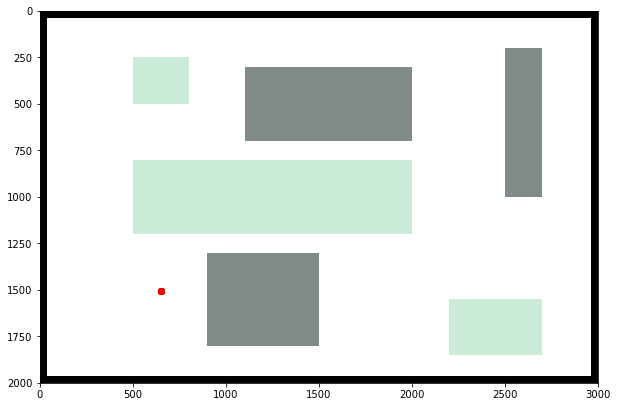

**********************************
Destination_x=653.000000 Destination_y=1508.000000
last_x=610.544783, last_y=1532.189632,last_a=0.000000
Next_state_number=4 Reward=6.000000
Next_x=622.104783 Next_y=1532.189632 True_angle=38.059424 DestinationRobotDistance=39.238409 Action=0 State=L60D30/60/H0
DestinationRobotAngle=-38.059424 Robot_current_angle=0
Epsilon=0.996752 Action_times=32865 Epoche_false=0
**********************************
Destination_x=1415.000000 Destination_y=1412.000000
last_x=1445.855752, last_y=1376.166850,last_a=135.000000
Next_state_number=96 Reward=6.000000
Next_x=1443.140462 Next_y=1378.882140 True_angle=4.645226 DestinationRobotDistance=43.458926 Action=2 State=L60D0/30/H2
DestinationRobotAngle=-49.645226 Robot_current_angle=135
Epsilon=0.996579 Action_times=34613 Epoche_false=1
**********************************
Destination_x=1964.000000 Destination_y=850.000000
last_x=1937.948726, last_y=807.873895,last_a=90.000000
Next_state_number=52 Reward=-2.000000
Next_x=19

In [ ]:
def Run_function():
    global Epoche
    global Action_times
    global Vector_x
    global Vector_y
    Crash_=False
    Arrive_=False
    Destination_x,Destination_y=Set_destination(3000,2000)
    im4=Draw_map4(Destination_x,Destination_y)
    plt.imshow(im4)
    plt.show()
    Current_x,Current_y,Current_a=Random_start(1000,2000,im4)
    Epoche_false=0
#     Vector_x=[]
#     Vector_y=[]
#     Vector_x.append(Current_x)
#     Vector_y.append(Current_y)
    while Epoche_false<500:

        True_a,Le_ri,Distance=Robot_destination(Destination_x,Destination_y,Current_x,Current_y,Current_a)
        Height_level_=Height_level(Current_x,Current_y,Current_a,im4)
        Current_state_number,Distance_level,Angle_level=Output_state_index(True_a,Le_ri,Distance,Height_level_)
        Next_action=Choose_action(Q_Table,Current_state_number,Action_times)
        Next_x,Next_y,Next_a,Reward,Next_state_number,Arrive,Crash=Next_state_F(Current_x,Current_y,Current_a,Destination_x,Destination_y,Next_action,im4)
        if Crash==True:
            Next_x,Next_y,Next_a=Random_start(3000,2000,im4)
        else:
            if Arrive==True:
                Next_true_a,Next_lr,Next_distance=Robot_destination(Destination_x,Destination_y,Next_x,Next_y,Next_a)
                print('**********************************')
                print('Destination_x=%f Destination_y=%f'%(Destination_x,Destination_y))
                print('last_x=%f, last_y=%f,last_a=%f'%(Current_x,Current_y,Current_a%360))
                print('Next_state_number=%d Reward=%f'%(Next_state_number,Reward))
                print('Next_x=%f Next_y=%f True_angle=%f DestinationRobotDistance=%f Action=%d State=%s'%(Next_x,Next_y,Next_true_a,Next_distance,Next_action,States[Next_state_number]))
                print('DestinationRobotAngle=%f Robot_current_angle=%d'%((np.arctan((Next_y-Destination_y)/(Next_x-Destination_x)))*180/np.pi,Next_a%360))
                print('Epsilon=%f Action_times=%d Epoche_false=%d'%(Epsilon_final+(Epsilon_start-Epsilon_final)*np.exp(-1*Decay_Rate*Action_times),Action_times,Epoche_false))
                Destination_x,Destination_y=Set_destination(3000,2000)
                im4=Draw_map4(Destination_x,Destination_y)
#                 plt.imshow(im4)
#                 plt.show()
                Next_x,Next_y,Next_a=Random_start(3000,2000,im4)
                Epoche_false+=1
                Epoche+=1
            Q_target=Reward+Beta*max(Q_Table[Next_state_number])
            Q_Table[Current_state_number][Next_action]+=Alpha*(Q_target-Q_Table[Current_state_number][Next_action])
#             Vector_x.append(Current_x)
#             Vector_y.append(Current_y)
        Current_x=Next_x
        Current_y=Next_y
        Current_a=Next_a
        Action_times+=1
    return Q_Table
Q_Table_final=Run_function()

In [ ]:
Q_Table_=pd.DataFrame(Q_Table_final,columns=Actions,index=States)
Q_Table_